# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')


### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [113]:
# Define a function to load data and aggregate them

import pandas as pd
import os

def load_and_combine_stock_data(file_list):
    combined_df = None

    for file in file_list:
        stock_name = os.path.basename(file).split('_')[0].upper()
        df = pd.read_csv(file)
        df['Date'] = pd.to_datetime(df['Date'])
        if 'Name' in df.columns:
            df = df.drop(columns=['Name'])
        df = df.rename(columns={col: f"{stock_name}_{col}" for col in df.columns if col != 'Date'})
        if combined_df is None:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='Date', how='inner')
    combined_df.sort_values('Date', inplace=True)
    combined_df.reset_index(drop=True, inplace=True)

    return combined_df


In [115]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_list = [
    'AMZN_stocks_data.csv',
    'GOOGL_stocks_data.csv',
    'IBM_stocks_data.csv',
    'MSFT_stocks_data.csv'
]

df = load_and_combine_stock_data(file_list)
print(df.head())

        Date  AMZN_Open  AMZN_High  AMZN_Low  AMZN_Close  AMZN_Volume  \
0 2006-01-03      47.47      47.85     46.25       47.58      7582127   
1 2006-01-04      47.48      47.73     46.69       47.25      7440914   
2 2006-01-05      47.16      48.20     47.11       47.65      5417258   
3 2006-01-06      47.97      48.58     47.32       47.87      6154285   
4 2006-01-09      46.55      47.10     46.40       47.08      8945056   

   GOOGL_Open  GOOGL_High  GOOGL_Low  GOOGL_Close  ...  IBM_Open  IBM_High  \
0      211.47      218.05     209.32       217.83  ...     82.45     82.55   
1      222.17      224.70     220.09       222.84  ...     82.20     82.50   
2      223.22      226.00     220.97       225.85  ...     81.40     82.90   
3      228.66      235.49     226.85       233.06  ...     83.95     85.03   
4      233.44      236.94     230.70       233.68  ...     84.10     84.25   

   IBM_Low  IBM_Close  IBM_Volume  MSFT_Open  MSFT_High  MSFT_Low  MSFT_Close  \
0    80.81 

In [117]:
# View specifics of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3019 non-null   datetime64[ns]
 1   AMZN_Open     3019 non-null   float64       
 2   AMZN_High     3019 non-null   float64       
 3   AMZN_Low      3019 non-null   float64       
 4   AMZN_Close    3019 non-null   float64       
 5   AMZN_Volume   3019 non-null   int64         
 6   GOOGL_Open    3019 non-null   float64       
 7   GOOGL_High    3019 non-null   float64       
 8   GOOGL_Low     3019 non-null   float64       
 9   GOOGL_Close   3019 non-null   float64       
 10  GOOGL_Volume  3019 non-null   int64         
 11  IBM_Open      3018 non-null   float64       
 12  IBM_High      3019 non-null   float64       
 13  IBM_Low       3018 non-null   float64       
 14  IBM_Close     3019 non-null   float64       
 15  IBM_Volume    3019 non-null   int64   

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [120]:
# Handle Missing Values
df.isnull().sum()

Date            0
AMZN_Open       0
AMZN_High       0
AMZN_Low        0
AMZN_Close      0
AMZN_Volume     0
GOOGL_Open      0
GOOGL_High      0
GOOGL_Low       0
GOOGL_Close     0
GOOGL_Volume    0
IBM_Open        1
IBM_High        0
IBM_Low         1
IBM_Close       0
IBM_Volume      0
MSFT_Open       0
MSFT_High       0
MSFT_Low        0
MSFT_Close      0
MSFT_Volume     0
dtype: int64

In [122]:
df.fillna(method='ffill', inplace=True)

In [124]:
df.isnull().sum()

Date            0
AMZN_Open       0
AMZN_High       0
AMZN_Low        0
AMZN_Close      0
AMZN_Volume     0
GOOGL_Open      0
GOOGL_High      0
GOOGL_Low       0
GOOGL_Close     0
GOOGL_Volume    0
IBM_Open        0
IBM_High        0
IBM_Low         0
IBM_Close       0
IBM_Volume      0
MSFT_Open       0
MSFT_High       0
MSFT_Low        0
MSFT_Close      0
MSFT_Volume     0
dtype: int64

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

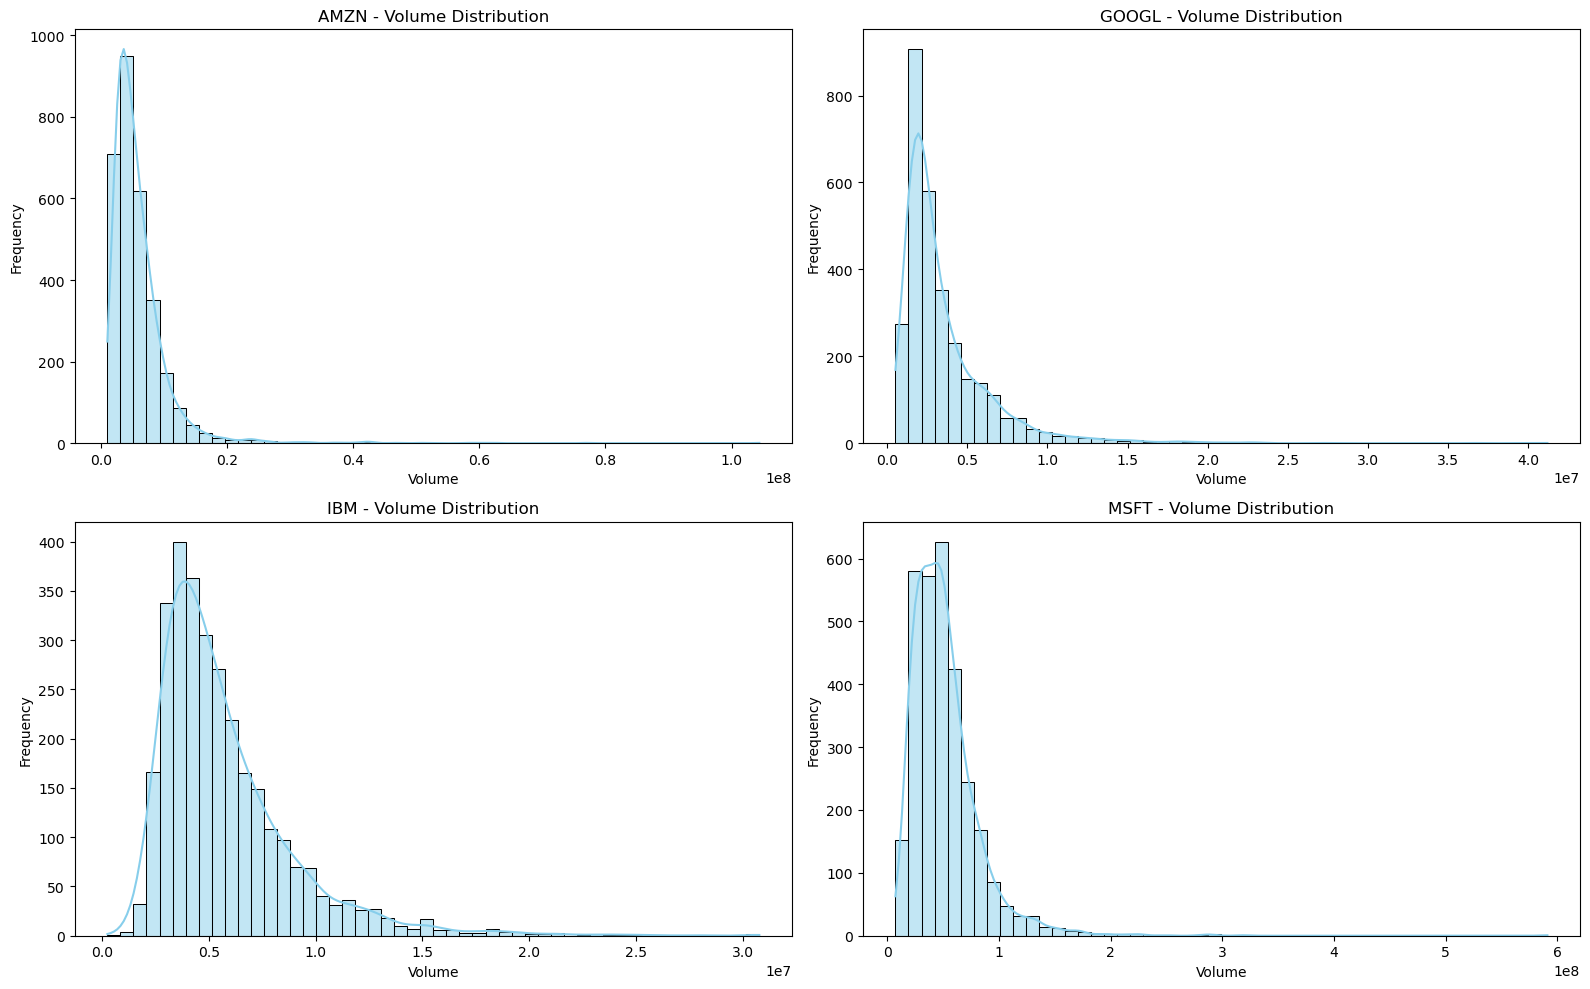

In [21]:
# Frequency distribution of volumes
plt.figure(figsize=(16,10))

companies = ['AMZN', 'GOOGL', 'IBM', 'MSFT']
for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[f'{company}_Volume'], bins=50, kde=True, color='skyblue')
    plt.title(f'{company} - Volume Distribution')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

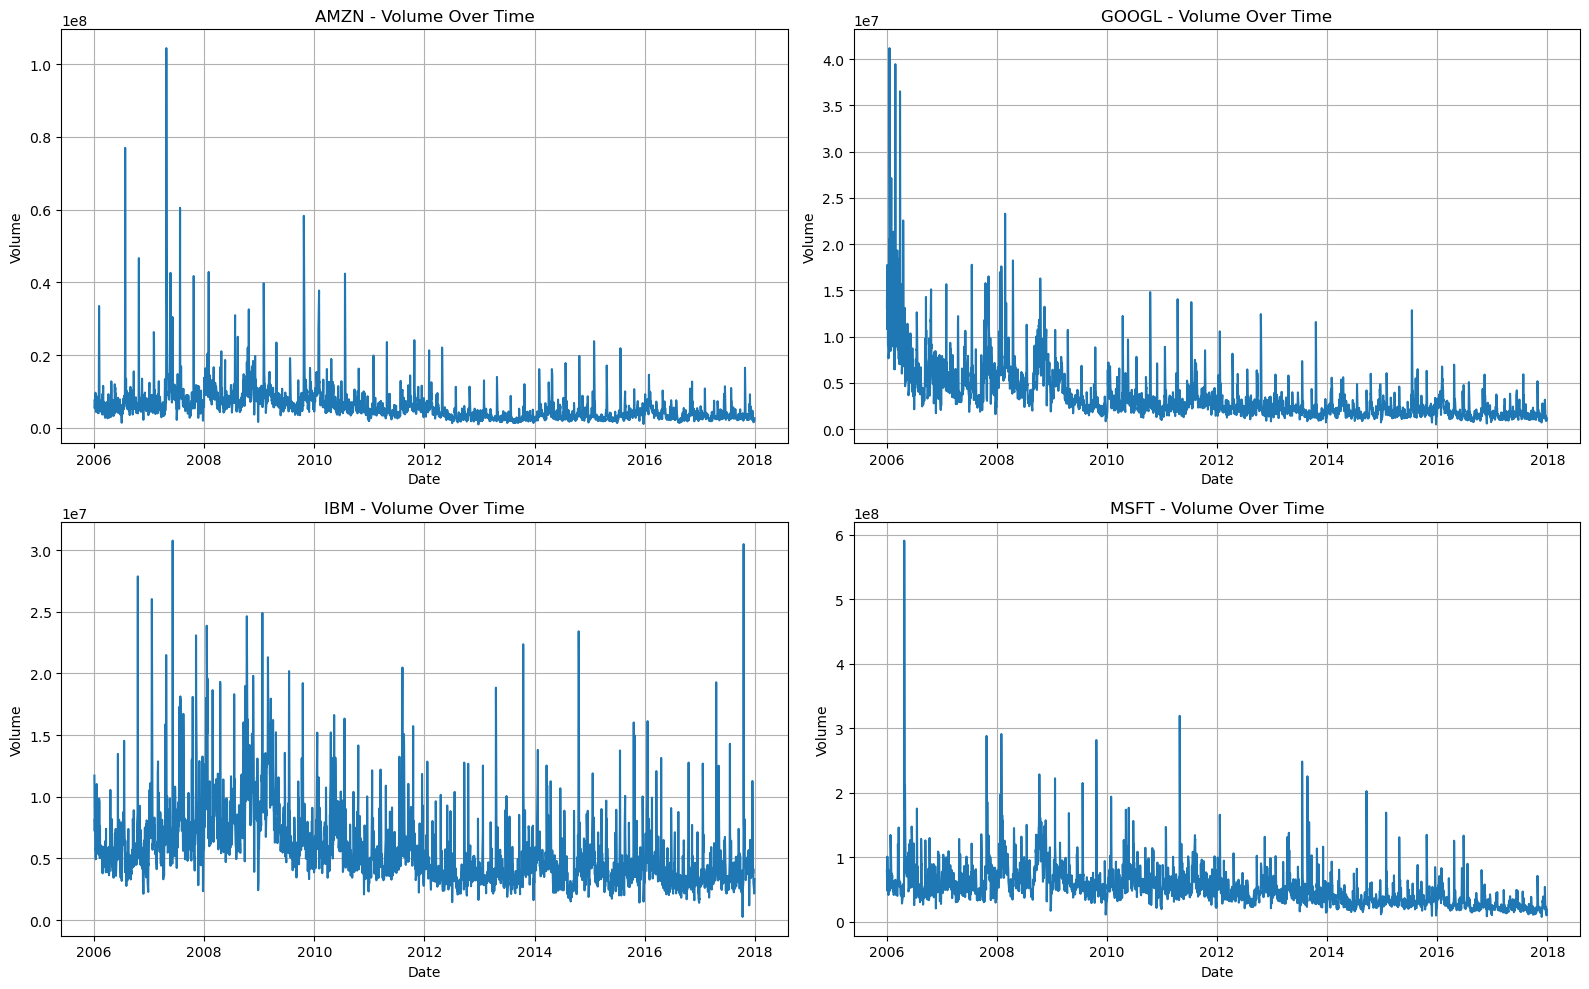

In [23]:
# Stock volume variation over time
plt.figure(figsize=(16,10))

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    plt.plot(df['Date'], df[f'{company}_Volume'], label=f'{company} Volume')
    plt.title(f'{company} - Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()
plt.show()


### **Insights from Stock Volume Analysis**

#### **Frequency Distribution of Volumes**

* **Distribution Shape:** The histograms generally exhibit a **right-skewed distribution** for stock volumes. This implies that most trading days have relatively lower volumes, while occasional days experience significantly higher volumes, which is characteristic of stock market data.
* **Company Differences:** Distributions might vary slightly between companies. Some companies may show a wider range of volumes or more frequent spikes in volume compared to others.
* **Potential Outliers:** The long tails on the right side of the histograms suggest the presence of potential outliers, representing days with exceptionally high trading volumes. These outliers could be attributed to specific events or news related to the company.

#### **Stock Volume Variation over Time**

* **Overall Trends:** The line plots help visualize trends in stock volume over time. You might observe periods of increased or decreased volume for each company. These trends can be correlated with broader market conditions or company-specific events.
* **Seasonality:** There might be some seasonality in the volume data, with certain times of the year showing higher or lower trading activity. This could be due to factors like earnings reports, product launches, or general economic cycles.
* **Volatility:** The plots can also give an indication of the stock's volatility. More erratic fluctuations in volume might suggest higher volatility, while smoother patterns indicate relatively stable trading.
* **Company-Specific Events:** Significant spikes or drops in volume often coincide with specific events related to the company, such as news announcements, mergers, or product releases.

#### **Overall Considerations**

* **Market Context:** It's crucial to consider the broader market context when interpreting these insights. Factors like overall market sentiment, economic conditions, and industry trends can influence stock volumes.
* **Data Limitations:** The insights are based on the historical data provided. Future stock volumes might deviate from these patterns due to unforeseen events or changes in market dynamics.
* **Further Analysis:** For a deeper understanding, combining these insights with other analyses like price trends, correlation with other market indicators, and fundamental analysis of the companies is recommended.

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

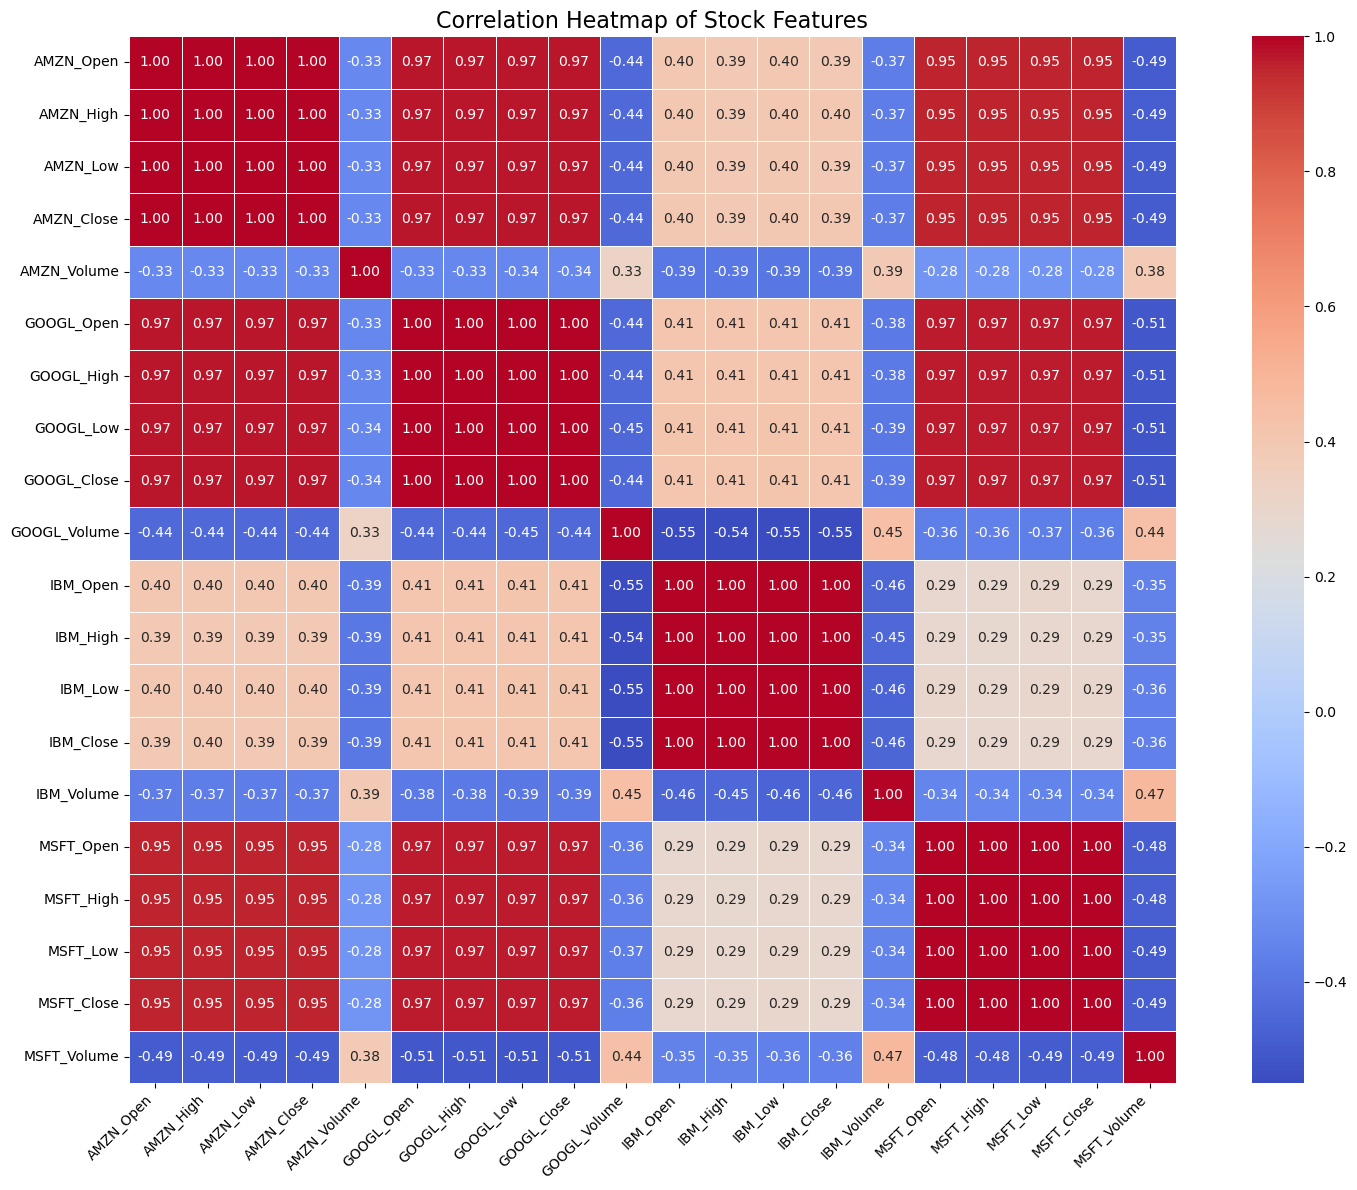

In [27]:
# Analyse correlations
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap of Stock Features', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(df)

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [128]:
# Define a function that divides the data into windows and generates target variable values for each window
import numpy as np

def create_windowed_data(df, window_size, target_col):
    X, y = [], []
    num_rows = df.shape[0]

    for i in range(0, num_rows - window_size):
        end = i + window_size
        window = df.iloc[i:end]

        target_row = df.iloc[end] if end < num_rows else None
        if target_row is not None:
            X.append(window.values)
            y.append(target_row[target_col].values)

    return np.array(X), np.array(y)

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [130]:
# Define a function that scales the windowed data
from sklearn.preprocessing import MinMaxScaler

def scale_features(X,y):
    scaler = MinMaxScaler()
    X_scaled = X.reshape(-1, X.shape[-1])
    X_scaled = scaler.fit_transform(X_scaled)
    X_scaled = X_scaled.reshape(X.shape)
    
    y_scaled = scaler.fit_transform(y) 
    return X_scaled, y_scaled, scaler

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

In [133]:
def train_test_split_seq(X, y, train_ratio=0.8):
    train_size = int(len(X) * train_ratio)
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    return X_train, X_test, y_train, y_test


#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [137]:
# Define a function to create input and output data points from the master DataFrame
def prepare_data_for_rnn(df, target_col, window_size, train_ratio=0.8):
    X, y = create_windowed_data(df, window_size, target_col)
    X_scaled,y_scaled,scaler = scale_features(X,y)
    X_train, X_test, y_train, y_test = train_test_split_seq(X_scaled, y_scaled, train_ratio)
    return X_train, X_test, y_train, y_test, scaler

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

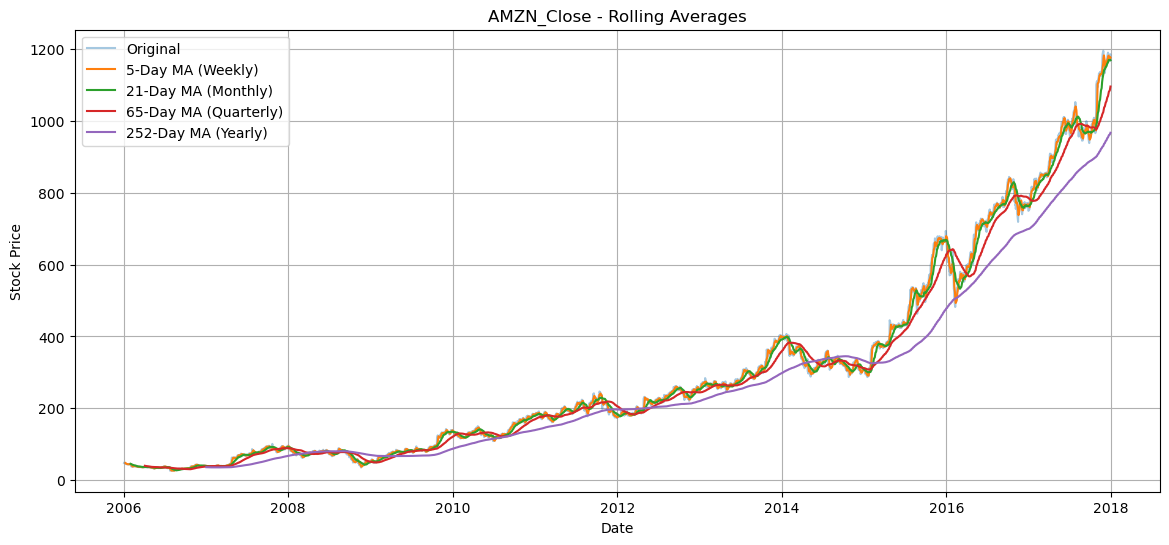

In [34]:
# Checking for patterns in different sequence lengths
import matplotlib.pyplot as plt

def plot_moving_averages(df, stock='AMZN_Close'):
    plt.figure(figsize=(14,6))
    plt.plot(df['Date'], df[stock], label='Original', alpha=0.4)
    plt.plot(df['Date'], df[stock].rolling(window=5).mean(), label='5-Day MA (Weekly)')
    plt.plot(df['Date'], df[stock].rolling(window=21).mean(), label='21-Day MA (Monthly)')
    plt.plot(df['Date'], df[stock].rolling(window=65).mean(), label='65-Day MA (Quarterly)')
    plt.plot(df['Date'], df[stock].rolling(window=252).mean(), label='252-Day MA (Yearly)')

    plt.title(f'{stock} - Rolling Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_moving_averages(df, stock='AMZN_Close')



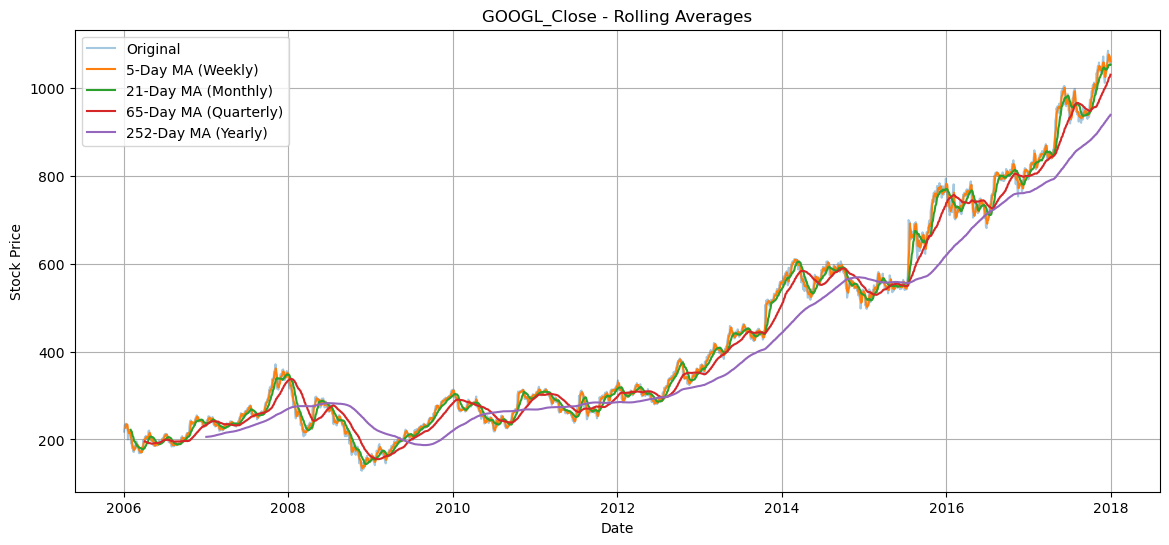

In [36]:
plot_moving_averages(df, stock='GOOGL_Close')

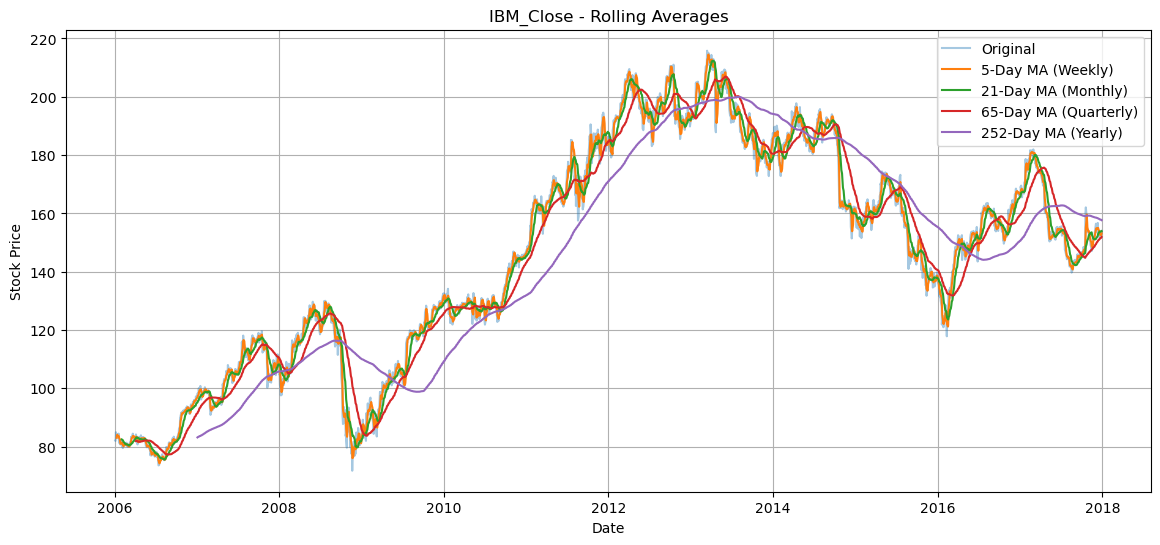

In [38]:
plot_moving_averages(df, stock='IBM_Close')

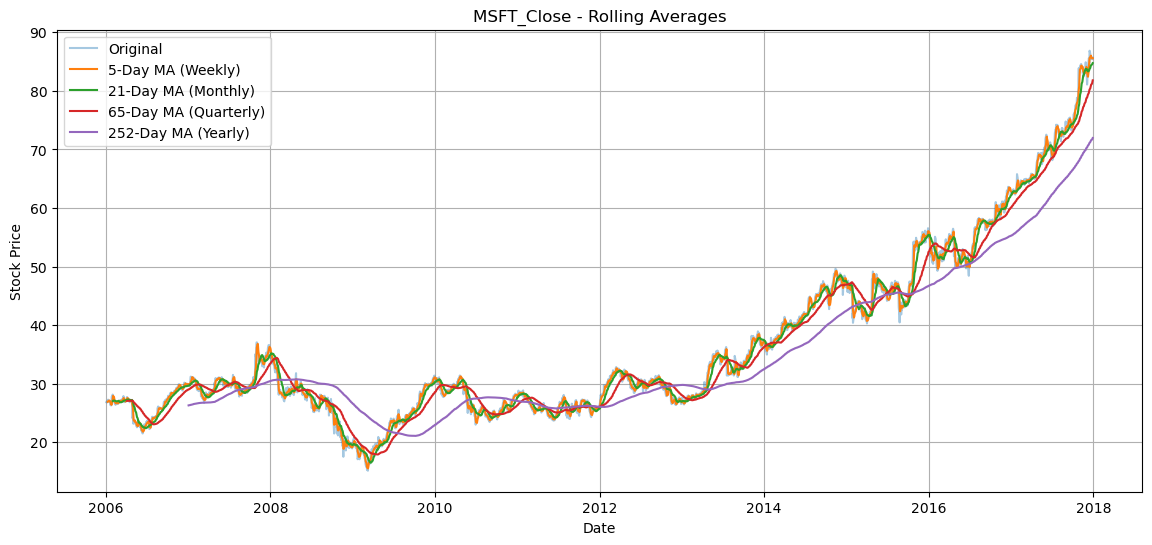

In [40]:
plot_moving_averages(df, stock='MSFT_Close')

Choosing a 21-day window for your  input sequence in an RNN for predicting stock prices like AMZN_Close,GOOGL_Close,MSFT_Close,IBM_Close offers a strategic balance between responsiveness and noise reduction.

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [142]:
# Create data instances from the master data frame using decided window size and window stride
# Droping the 'Date' column before using this function
df_no_date = df.drop(columns=['Date'])
target_names = [col for col in df_no_date.columns if 'Close' in col]

X_train, X_test, y_train, y_test, scaler = prepare_data_for_rnn(df_no_date, target_col=target_names, window_size=21)

In [143]:
# Check the number of data points generated
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (2398, 21, 20), y_train shape: (2398, 4)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

X_train: (2398, 21, 20)

  2398 = number of samples (windows)

  21 = window size (time steps per sample)

  20 = number of features (you likely kept all numeric columns for all 4 companies — Open, High, Low, Close, Volume × 4 = 20)

y_train: (2398,4)

  4 target value per window (likely the AMZN_Close,GOOGL_Close,MSFT_Close,IBM_Close on the day after each window)



In [148]:
# Check if the datasets are compatible inputs to neural networks

## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

# **Simple RNN**

In [155]:
# Create a function that creates a simple RNN model according to the model configuration arguments
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from keras.optimizers import Adam

def build_rnn_model(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('rnn_units', min_value=32, max_value=128, step=32), input_shape=(21, 20)))
    model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(Dense(4))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), loss='mse')
    return model

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [183]:
# Install packages for hyperparameter tuning
!pip install keras-tuner

In [158]:
# Find an optimal configuration of simple RNN
import keras_tuner as kt
tuner = kt.RandomSearch(
    build_rnn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='rnn_stock'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 00m 05s]
val_loss: 0.002730529522523284

Best val_loss So Far: 0.0004403595521580428
Total elapsed time: 00h 00m 50s


In [160]:
best_model = tuner.get_best_models(num_models=1)[0]

In [162]:
# Find the best configuration based on evaluation metrics
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"RNN units: {best_hps.get('rnn_units')}")
print(f"Dropout rate: {best_hps.get('dropout_rate')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
RNN units: 128
Dropout rate: 0.4
Learning rate: 0.005986673858497197


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [165]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model
final_model = build_rnn_model(best_hps)
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1300 - val_loss: 0.0071
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0067
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1851e-04 - val_loss: 8.9219e-04
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4316e

Plotting the actual vs predicted values

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


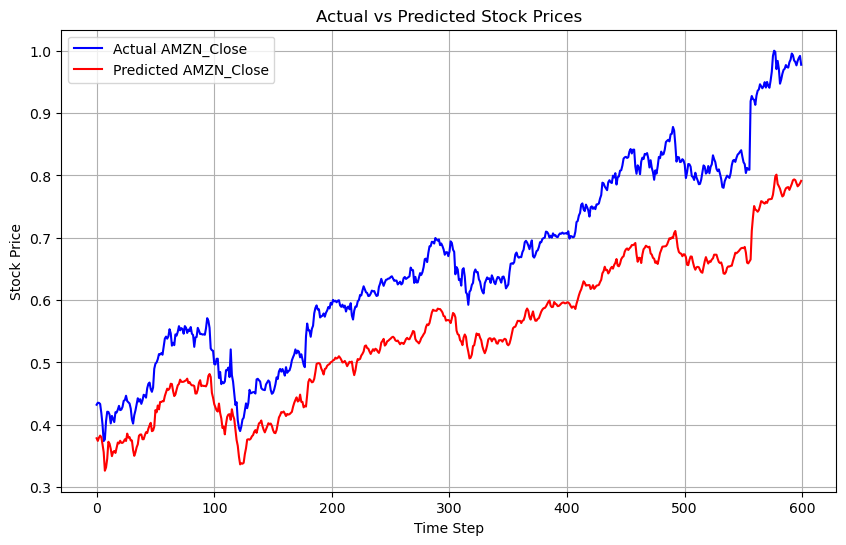

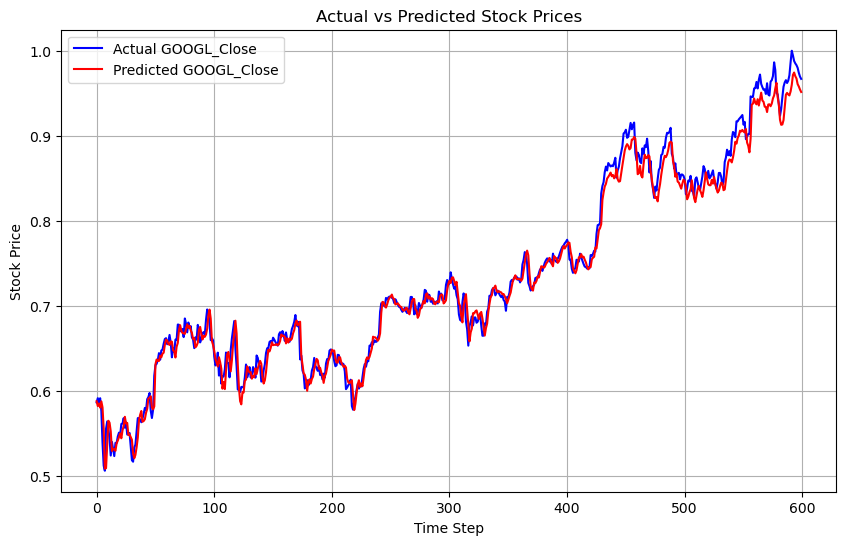

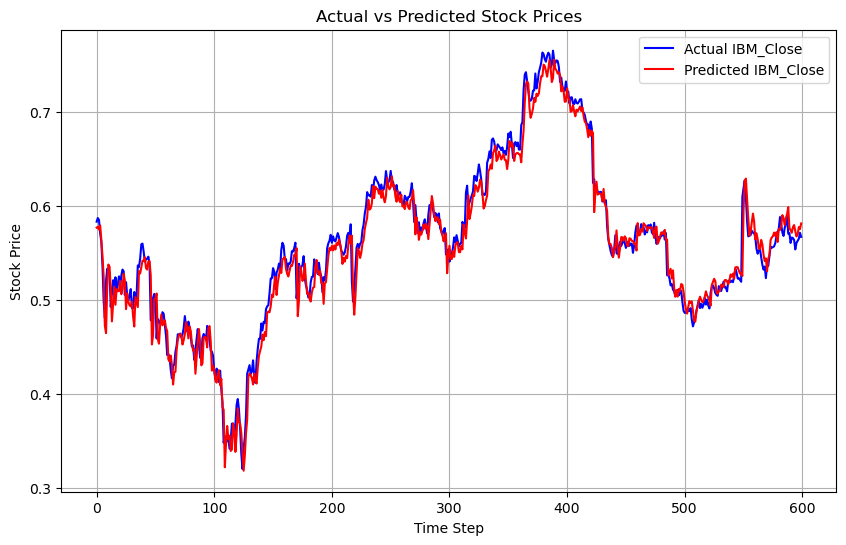

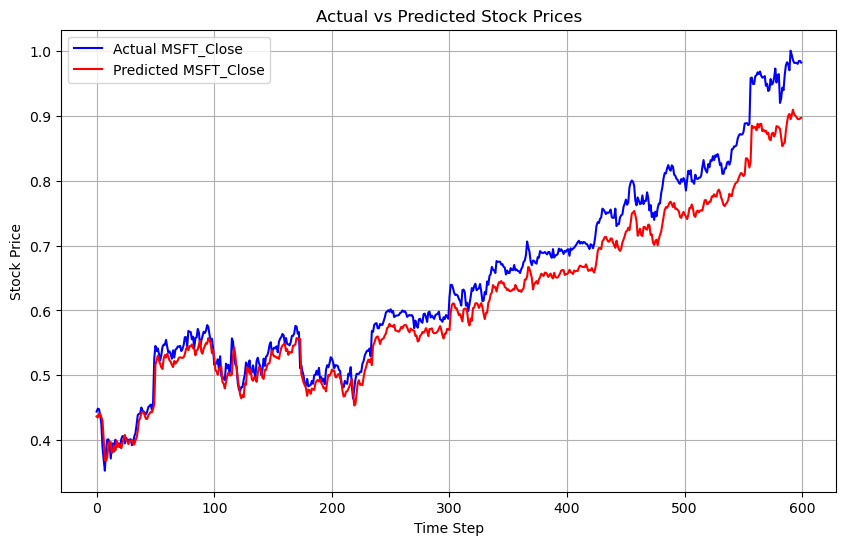

In [168]:
# Predict on the test data and plot

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_model.predict(X_test)


# Plot actual vs predicted values
for i, target in enumerate(target_names):
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test[:, i], color='blue', label=f'Actual {target}')
    plt.plot(y_pred[:, i], color='red', label=f'Predicted {target}')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [171]:
# Compute the performance of the model on the testing data set

test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022     

✅ Final Test MSE: 0.0038


In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,accuracy_score
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.040758982254498116
Mean Squared Error (MSE): 0.003825148209317971
Root Mean Squared Error (RMSE): 0.06184778257397731


In [175]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: 0.8294072764830176


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

# **Single Layer LSTM**

In [177]:
# # Define a function to create a model and specify default values for hyperparameters
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import keras_tuner as kt

def build_lstm_model(hp):
    model = Sequential()

    # Tune number of LSTM units
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=16)
    model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=dropout_rate))

    # Output layer
    model.add(Dense(4))

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse'
    )

    return model


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [180]:
# Find an optimal configuration
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='/mnt/data/lstm_tuning',
    project_name='lstm_stock_prediction'
)
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             batch_size=32,
             verbose=1)

Trial 10 Complete [00h 00m 20s]
val_loss: 0.0005733415018767118

Best val_loss So Far: 0.00012631379649974406
Total elapsed time: 00h 04m 16s


In [182]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"RNN units: {best_hps.get('lstm_units')}")
print(f"Dropout rate: {best_hps.get('dropout_rate')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
RNN units: 80
Dropout rate: 0.0
Learning rate: 0.01


#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [187]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model
final_model = build_lstm_model(best_hps)
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0241 - val_loss: 0.0062
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6727e-04 - val_loss: 0.0022
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8645e-04 - val_loss: 0.0012
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6109e-04 - val_loss: 9.1572e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4909e-04 - val_loss: 5.2464e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4861e-04 - val_loss: 3.3532e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2993e-04 - val_loss: 4.8070e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3630e-04 - val_loss: 3.3233e-04
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3325e-04 - val_loss: 3.4788e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2437e-04 - val_loss: 3.7829e-04
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4232e-04 - val_loss: 2.5718e-04
E

**Final Test MSE: 0.0052**

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


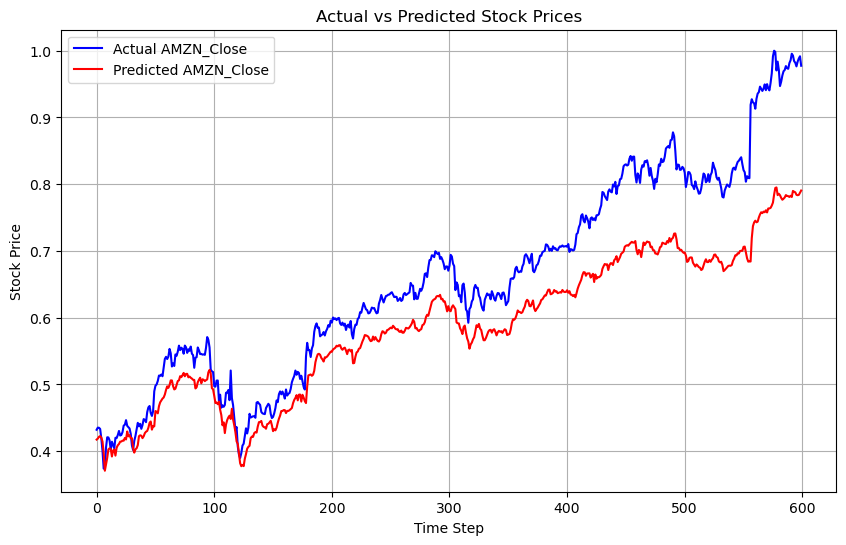

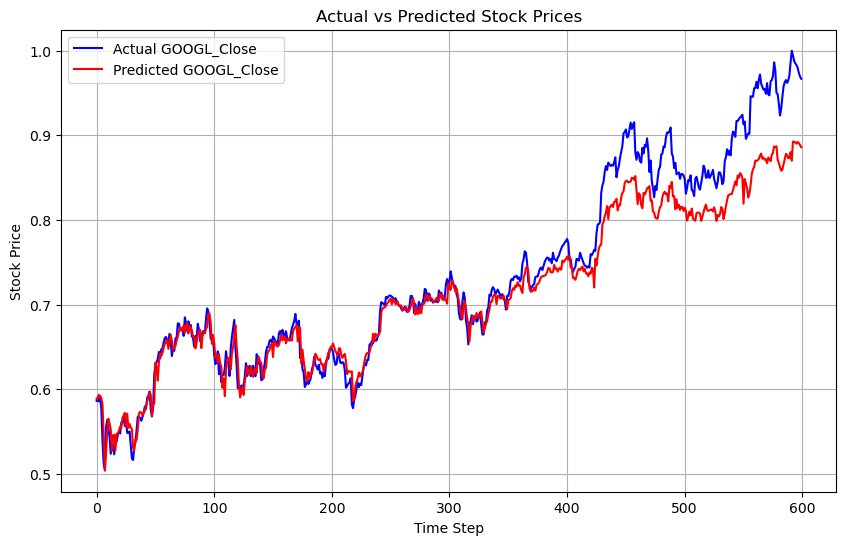

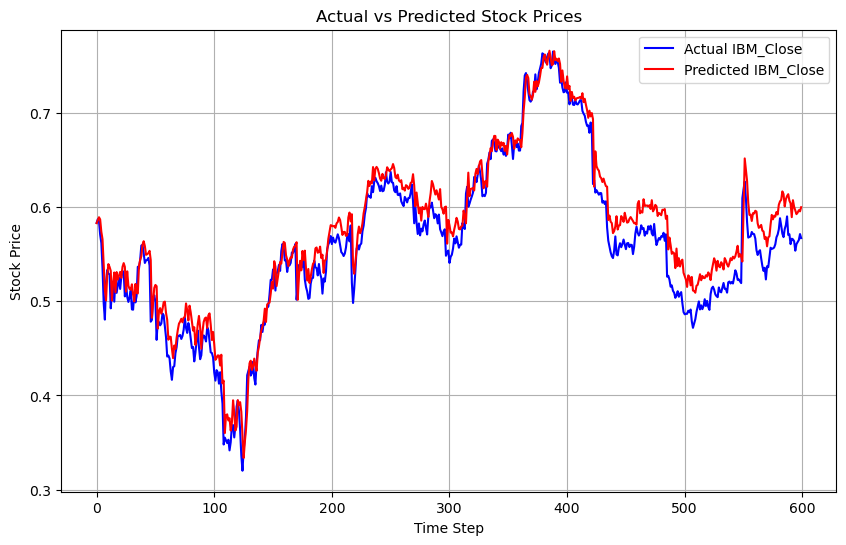

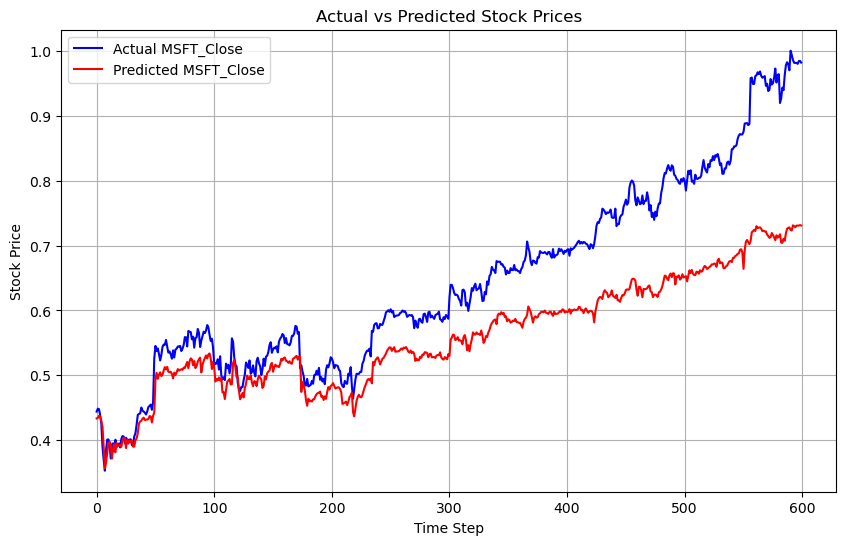

In [192]:
# Compute the performance of the model on the testing data set
# Predict on the test data and plot

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Plot actual vs predicted values
for i, target in enumerate(target_names):
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test[:, i], color='blue', label=f'Actual {target}')
    plt.plot(y_pred[:, i], color='red', label=f'Predicted {target}')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


Plotting the actual vs predicted values

In [195]:
# Predict on the test data
# Evaluate on test set
test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018     

✅ Final Test MSE: 0.0052


In [197]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.04994079891079078
Mean Squared Error (MSE): 0.0052046824888464256
Root Mean Squared Error (RMSE): 0.07214348542208385


In [199]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: 0.7513569333288758


# **Complex LSTM**

In [204]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_improved_lstm_model(hp):
    model = Sequential()

    # First LSTM Layer (return_sequences=True for stacking)
    model.add(LSTM(
        units=hp.Int('lstm_units_1', min_value=64, max_value=128, step=16),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)))

    # Second LSTM Layer
    model.add(LSTM(
        units=hp.Int('lstm_units_2', min_value=32, max_value=96, step=16),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))

    # Optional Dense layer before final output
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))

    # Final output layer
    model.add(Dense(4))

    # Compile
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse'
    )

    return model


In [206]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_improved_lstm_model,
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1,
    directory='/mnt/data/improved_lstm',
    project_name='stacked_lstm_tuning'
)

tuner.search(X_train, y_train,
             epochs=40,
             validation_split=0.2,
             batch_size=32,
             verbose=1)


Trial 15 Complete [00h 00m 41s]
val_loss: 0.0022991704754531384

Best val_loss So Far: 0.0006355416844598949
Total elapsed time: 00h 09m 19s


In [208]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"1st LSTM Units     : {best_hps.get('lstm_units_1')}")
print(f"1st Dropout Rate   : {best_hps.get('dropout_1')}")
print(f"2nd LSTM Units     : {best_hps.get('lstm_units_2')}")
print(f"2nd Dropout Rate   : {best_hps.get('dropout_2')}")
print(f"Dense Layer Units  : {best_hps.get('dense_units')}")
print(f"Learning Rate      : {best_hps.get('learning_rate')}")

Best Hyperparameters:
1st LSTM Units     : 64
1st Dropout Rate   : 0.30000000000000004
2nd LSTM Units     : 64
2nd Dropout Rate   : 0.2
Dense Layer Units  : 32
Learning Rate      : 0.001


In [210]:
final_model = build_improved_lstm_model(best_hps)
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0197 - val_loss: 0.0188
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0031
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8959e-04 - val_loss: 0.0024
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2384e-04 - val_loss: 0.0023
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3030e-04 - val_loss: 0.0018
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3446e-04 - val_loss: 0.0019
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7425e-04 - val_loss: 0.0026
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1

# **✅ Final Test MSE: 0.0436**

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


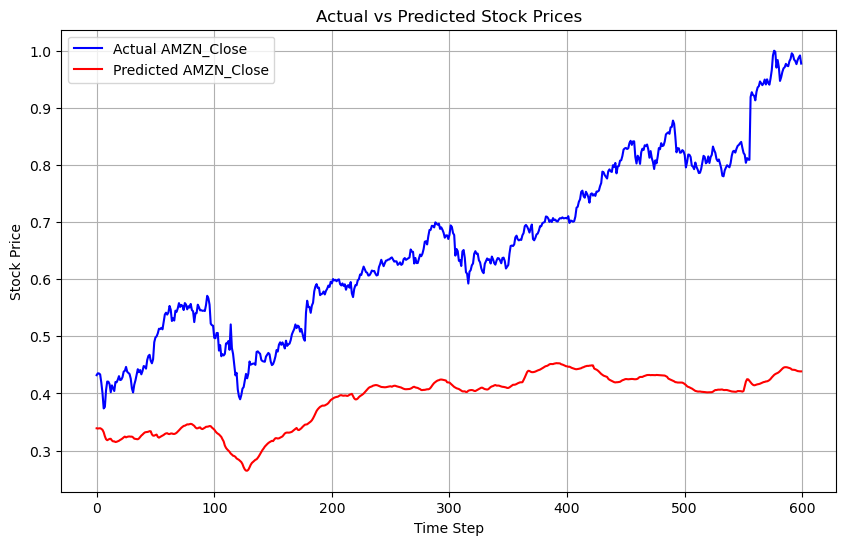

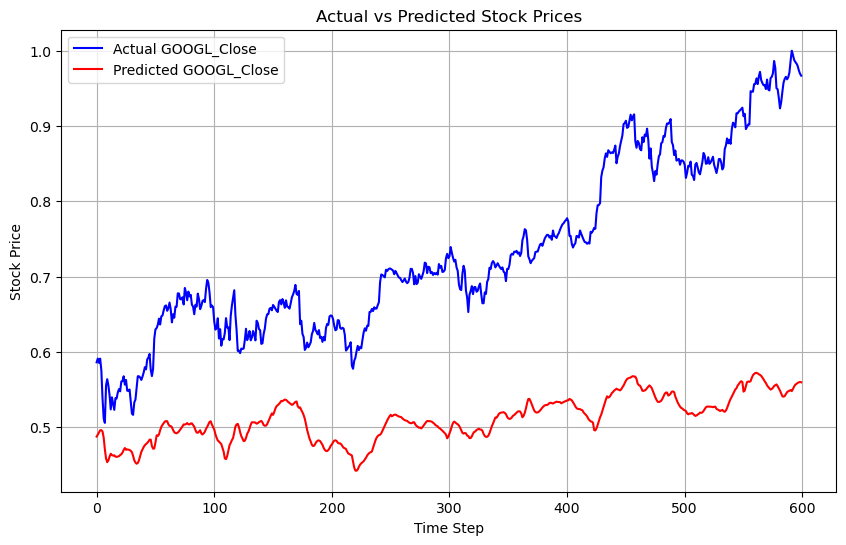

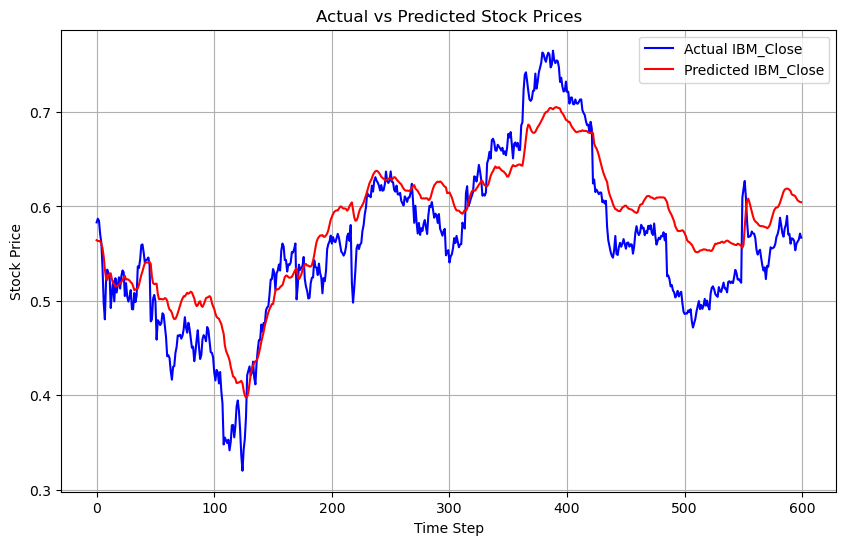

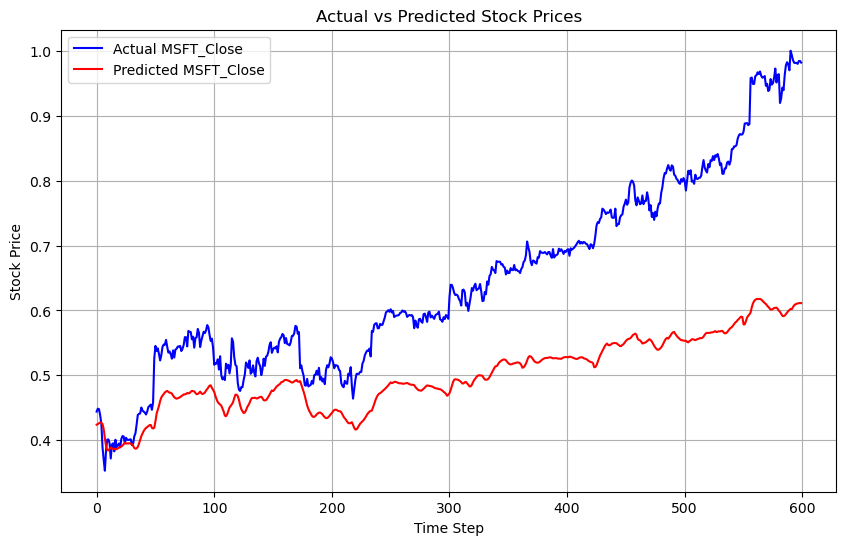

In [213]:
# Compute the performance of the model on the testing data set
# Predict on the test data and plot

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Plot actual vs predicted values
for i, target in enumerate(target_names):
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test[:, i], color='blue', label=f'Actual {target}')
    plt.plot(y_pred[:, i], color='red', label=f'Predicted {target}')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


In [215]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.16689712113646604
Mean Squared Error (MSE): 0.04361866456447171
Root Mean Squared Error (RMSE): 0.20885081892219554


In [217]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: -1.3361618713771208


# **Complex GRU**

In [220]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam

def build_gru_model(hp):
    model = Sequential()

    # First GRU Layer
    model.add(GRU(
        units=hp.Int('gru_units_1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)))

    # Second GRU Layer
    model.add(GRU(
        units=hp.Int('gru_units_2', min_value=16, max_value=96, step=16),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))

    # Optional Dense layer
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))

    # Output layer
    model.add(Dense(4))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mse'
    )

    return model


In [222]:
import keras_tuner as kt

tuner_gru = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1,
    directory='/mnt/data/gru_tuning',
    project_name='gru_stock_model'
)

tuner_gru.search(X_train, y_train,
                 epochs=40,
                 validation_split=0.2,
                 batch_size=32,
                 verbose=1)


Trial 15 Complete [00h 01m 07s]
val_loss: 0.0005145689938217402

Best val_loss So Far: 0.0005145689938217402
Total elapsed time: 00h 10m 40s


In [224]:
best_hps = tuner_gru.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"1st GRU Units     : {best_hps.get('gru_units_1')}")
print(f"1st Dropout Rate   : {best_hps.get('dropout_1')}")
print(f"2nd GRU Units     : {best_hps.get('gru_units_2')}")
print(f"2nd Dropout Rate   : {best_hps.get('dropout_2')}")
print(f"Dense Layer Units  : {best_hps.get('dense_units')}")
print(f"Learning Rate      : {best_hps.get('learning_rate')}")

Best Hyperparameters:
1st GRU Units     : 64
1st Dropout Rate   : 0.4
2nd GRU Units     : 64
2nd Dropout Rate   : 0.2
Dense Layer Units  : 48
Learning Rate      : 0.001


In [226]:
final_model = build_gru_model(best_hps)
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss = final_model.evaluate(X_test, y_test)
print(f"\n✅ Final Test MSE: {test_loss:.4f}")

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0261 - val_loss: 0.0114
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.1234e-04 - val_loss: 0.0016
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.3984e-04 - val_loss: 0.0011
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.6812e-04 - val_loss: 0.0024
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9567e-04 - val_loss: 0.0015
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/

**✅ Final Test MSE: 0.0417**

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


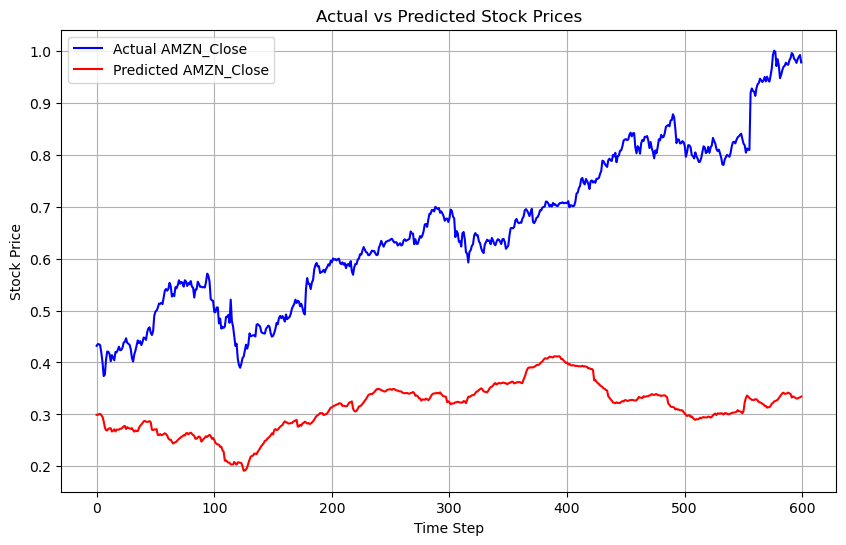

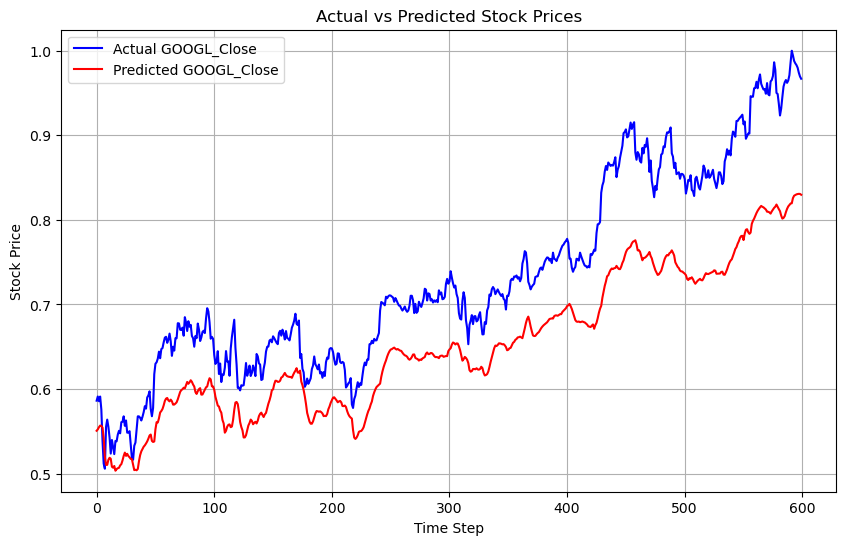

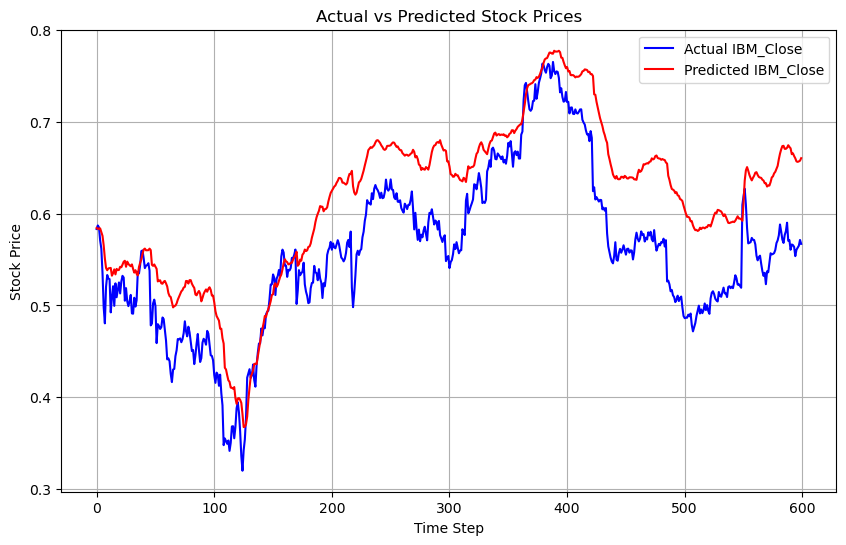

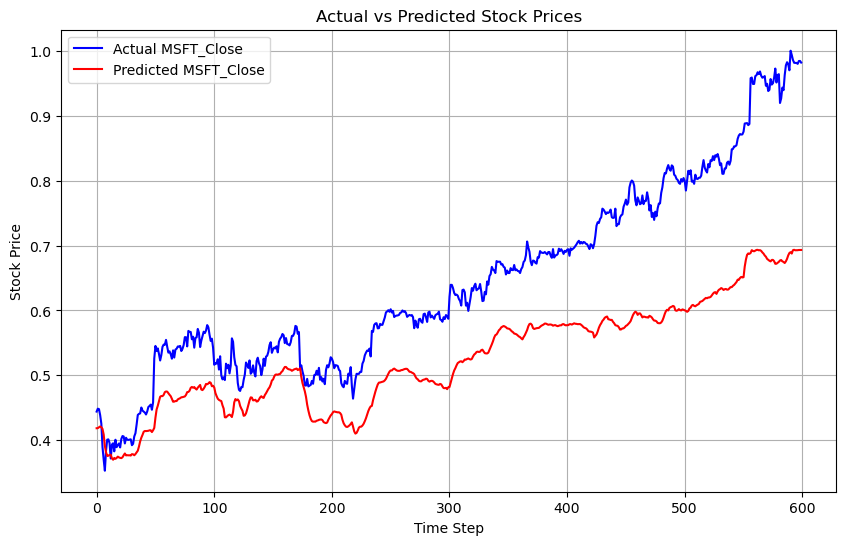

In [228]:
# Compute the performance of the model on the testing data set
# Predict on the test data and plot

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Plot actual vs predicted values
for i, target in enumerate(target_names):
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test[:, i], color='blue', label=f'Actual {target}')
    plt.plot(y_pred[:, i], color='red', label=f'Predicted {target}')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [230]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.1496535827730444
Mean Squared Error (MSE): 0.04167896727073997
Root Mean Squared Error (RMSE): 0.20415427321204904


In [232]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: -0.9425754712186777


# **Bidirectnal Stacked RNN**

In [237]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
import keras_tuner as kt

def build_stacked_bidirectional_rnn_hp(hp):
    model = Sequential()

    # First Bidirectional RNN Layer
    model.add(
        Bidirectional(
            SimpleRNN(
                units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                return_sequences=True
            ),
            input_shape=(X_train.shape[1], X_train.shape[2])
        )
    )
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # Second Bidirectional RNN Layer
    model.add(
        Bidirectional(
            SimpleRNN(
                units=hp.Int('units_2', min_value=16, max_value=64, step=16)
            )
        )
    )
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # Dense output layer
    model.add(Dense(4))

    # Compile model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mse',
        metrics=['mae']
    )

    return model


In [239]:
tuner = kt.RandomSearch(
    build_stacked_bidirectional_rnn_hp,
    objective='val_loss',
    max_trials=15,  # Try 15 different combinations
    executions_per_trial=1,
    directory='tuner_stacked_bidirectional_rnn',
    project_name='stock_prediction'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Trial 15 Complete [00h 00m 26s]
val_loss: 0.0006014125538058579

Best val_loss So Far: 0.0006014125538058579
Total elapsed time: 00h 06m 07s


In [241]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"1st Bidirectnal RNN Units     : {best_hps.get('units_1')}")
print(f"1st Dropout Rate   : {best_hps.get('dropout_1')}")
print(f"2nd Bidirectnal RNN Units     : {best_hps.get('units_2')}")
print(f"2nd Dropout Rate   : {best_hps.get('dropout_2')}")
print(f"Learning Rate      : {best_hps.get('learning_rate')}")

Best Hyperparameters:
1st Bidirectnal RNN Units     : 96
1st Dropout Rate   : 0.2
2nd Bidirectnal RNN Units     : 64
2nd Dropout Rate   : 0.2
Learning Rate      : 0.001


In [243]:
final_model = build_stacked_bidirectional_rnn_hp(best_hps)
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss, test_mae = final_model.evaluate(X_test, y_test)

print(f"Test MSE (loss): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.2666 - mae: 0.4050 - val_loss: 0.0088 - val_mae: 0.0756
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0865 - mae: 0.2320 - val_loss: 0.0115 - val_mae: 0.0855
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0485 - mae: 0.1715 - val_loss: 0.0061 - val_mae: 0.0612
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0302 - mae: 0.1368 - val_loss: 0.0052 - val_mae: 0.0588
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0222 - mae: 0.1164 - val_loss: 0.0060 - val_mae: 0.0658
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0158 - mae: 0.0983 - val_loss: 0.0047 - val_mae: 0.0541
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0129 - mae: 0.0889 - val_loss: 0.0073 - val_mae: 0.0771
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0100 - mae: 0.0783 - val_loss: 0.0034 - val_mae: 0.0478
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0089 -

**Test MSE loss: 0.0595**
**Test MAE: 0.2177**

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


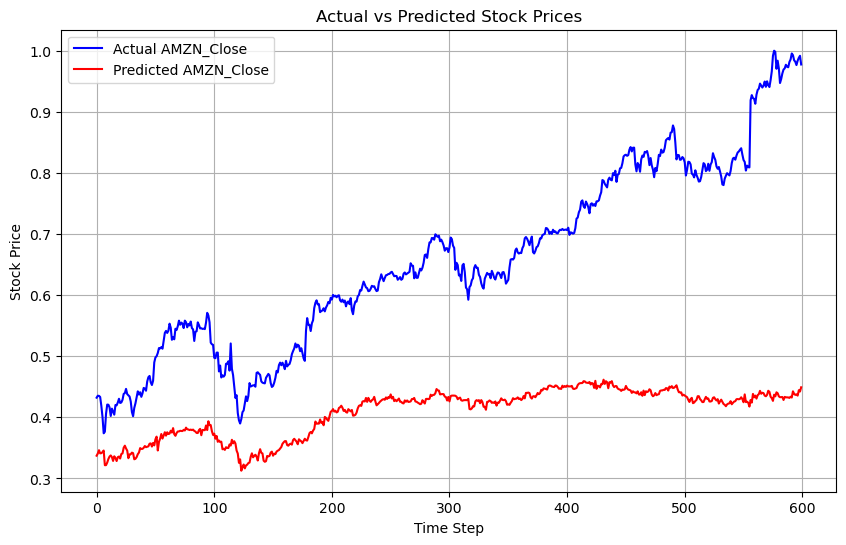

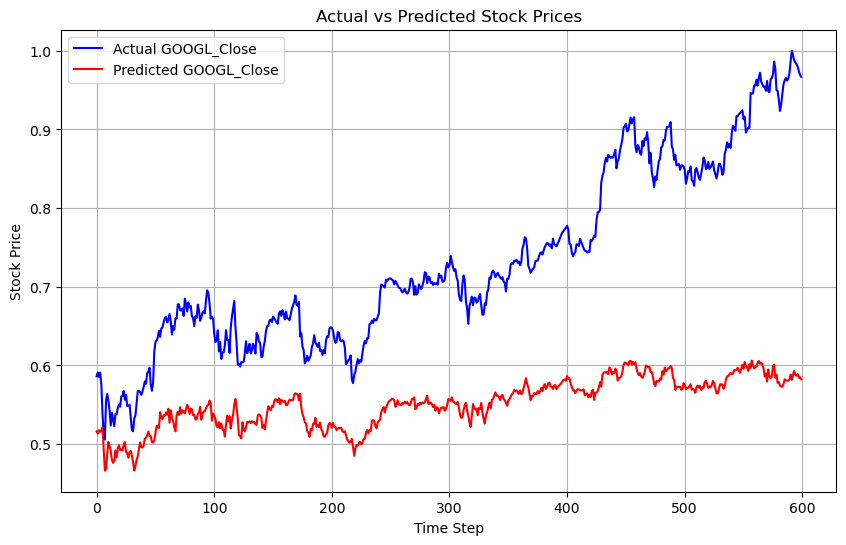

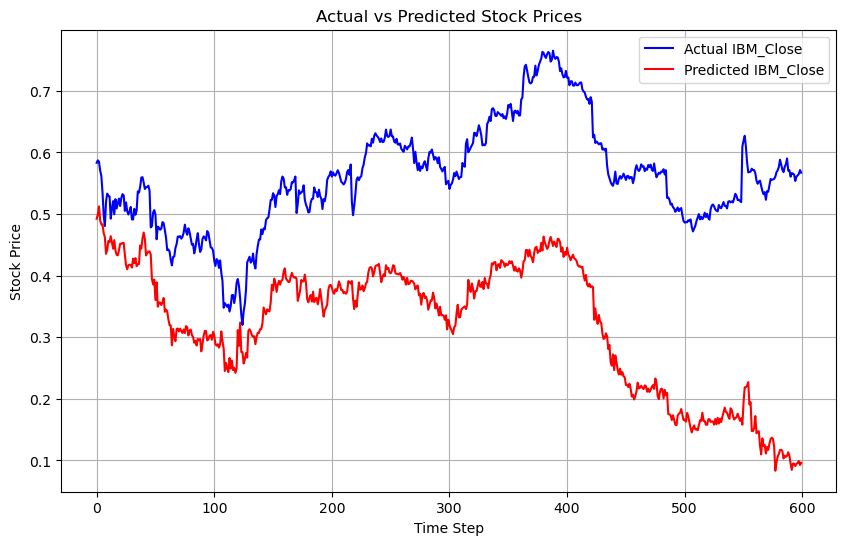

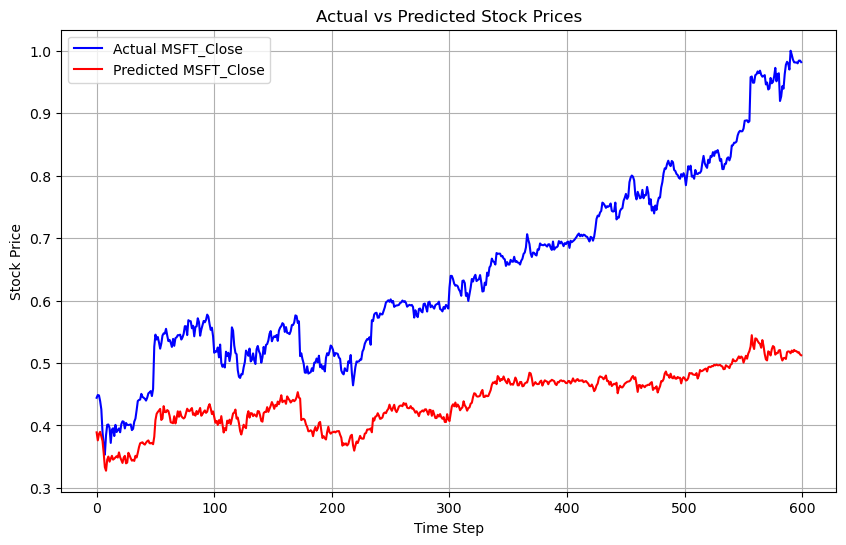

In [245]:
# Compute the performance of the model on the testing data set
# Predict on the test data and plot

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Plot actual vs predicted values
for i, target in enumerate(target_names):
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test[:, i], color='blue', label=f'Actual {target}')
    plt.plot(y_pred[:, i], color='red', label=f'Predicted {target}')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


In [247]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.21767306083909005
Mean Squared Error (MSE): 0.05953856278744486
Root Mean Squared Error (RMSE): 0.24400525155710248


In [249]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

R² Score: -3.436845005821682


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

#  Data Insights

You worked with stock price data for IBM, Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

Each company's dataset contained 3019 records from Jan 1, 2006 to Jan 1, 2018.

Features included: **Open**, **High**, **Low**, **Close**, **Volume**.

You combined all four datasets into one master DataFrame with appropriately renamed columns.

Missing values were handled carefully.

Heatmap analysis showed strong correlations between Open, High, Low, and Close prices (as expected).

Google is highly correlated with Amazon and Microsoft with a correlation of 0.97 .

Amazon and Microsoft are also highly correlated with correlation of 0.95

A **21-day sliding window** was chosen for modeling (based on the autocorrelation plot).

---


#  Data Preprocessing

Datasets are loaded and combined them into one master DataFrame.

Append the stock names into the columns of their respective data frame.

Missing values were handled carefully.

Created windows from the master data frame and obtain windowed X and corresponding windowed y values.

Scaled the data sets in an appropriate manner.

Data was split into training(80%) and Test(20%) sets.

---

# Model Building

Five RNN models were built with the following architecture:


Model 1(Simple RNN):
* 1 Simple RNN layer
* 1 Dropout layers to prevent overfitting
* Learning rate to control the speed of learning dimensions
* x activation for classification

  
Model 2(LSTM -basic): 
* 1 LSTM layer 
* 1 Dropout layers to prevent overfitting
* Learning rate to control the speed of learning
* Dense layer for classification

  
Model 3(Improved LSTM):
* 2 LSTM layers 
* 2 Dropout layers to prevent overfitting
* Learning rate to control the speed of learning
*Dense layer for classification

Model 4(GRU):
* 2 GRU layers 
* 2 Dropout layers to prevent overfitting
* Learning rate to control the speed of learning
*Dense layer for classificationcation

Model 5(Bidirectional LSTM):
- 2 Bidirectional simple RNN layers 
- 2 Dropout layers to prevent overfitting
- Learning rate to control the speed of learning
- Dense layer for classification

---

#  Compilation:

Optimizer: Adam

Loss Function: mean squared error

---

#  Models Trained

| Model                  | Test MSE | R2 score | Comments                                                        |
|------------------------|----------|----------|-----------------------------------------------------------------|
| Simple RNN             | 0.0038   |  0.829   | Best performer! Simple but effective.                           |
| LSTM (basic)           | 0.0052   |  0.75    | Better than remaining models, but still worse than Simple RNN                     |
| Improved LSTM          | 0.0436   | -1.33    | Worse than basic LSTM, maybe underfitting.        |
| GRU                    | 0.0417   | -0.94    | Worse than basic LSTM, maybe underfitting.                          |
| Bidirectional LSTM     | 0.0595   | -3.43    | Much worse! Bidirectional not suited for this series prediction. |

---

#  Key Observations

- Simple RNN surprisingly performed the best here! Likely because:
  - Stock market data isn't very long-term dependent.
  - Simple RNNs capture short-term patterns better for this task.
- LSTM/GRU were heavier and probably overfit slightly.
- Bidirectional LSTM was not appropriate because future information is unavailable in stock prediction.
- Model complexity hurt more than helped for this dataset.

---

#  Final Conclusion

✅ Simple RNN with a 21-day window gave the best results in this stock price forecasting task.  
✅ It kept the model lightweight, fast to train, and accurate enough.  
✅ More complex models (LSTM, GRU, Bi-LSTM) didn't outperform — possibly because stock prices have short-term dependencies, not deep long-term ones.

---

#  Final Recommendation

- Stick with **Simple RNN** or a Basic **LSTM**.

Further boost performance using:
- **Ensembling** (average predictions of multiple models)
- **Feature engineering** (technical indicators like RSI, MACD)
- **Data augmentation** (small noise addition)

If needed, test **1D CNNs** or **Temporal Convolutional Networks (TCN)** — often outperform RNNs on time series!
